# Python Lists

## Creating

In [1]:
# this is a python list
a = [42, 7, 13, 24601, 2001, 3.50]

In [2]:
# this is a list comprehension -- think of it as a sexy for loop

# the following gives us a list in which we multiplied each element in a by 2
z = [i * 2 for i in a]
z

[84, 14, 26, 49202, 4002, 7.0]

## Indexing

In [3]:
# you can index into it
a[0]

42

In [5]:
# what's the 3rd element?
a[2]

13

In [6]:
# indices can also be negative
# this gives you the last element
a[-1]

3.5

## Slicing

In [7]:
# you can also get subsets of the list with slicing
#     a[start:end]
# [start, end)

# this returns the 3rd and 4th entries (indices 2 and 3 -- note we exclude 4!)
a[2:4]

[13, 24601]

In [8]:
# if you leave one side blank, it automatically goes all the way
# first five:
a[:5]

[42, 7, 13, 24601, 2001]

In [9]:
# how do you get the last three elements?
a[3:]

[24601, 2001, 3.5]

In [10]:
# slices can also skip numbers
# a[start:end:interval]

# this gives us every other number, starting with the first
a[::2]

[42, 13, 2001]

In [11]:
# the interval can also be negative
# what does that do?

a[::-2]

[3.5, 24601, 7]

# Numpy

In [48]:
import numpy as np

## Creating

In [13]:
# numpy arrays can be created from a python list
b = np.array(a)
b

array([4.2000e+01, 7.0000e+00, 1.3000e+01, 2.4601e+04, 2.0010e+03,
       3.5000e+00])

Right now, it looks an awful like a python list, but there are some key points you should know.

numpy arrays are:
- homogeneous (all elements in an array have the same type)
- multidimensional

In [14]:
# Homogeneous: all numpy arrays have an associated data type.
# numbers are usually ints or floats
b.dtype

dtype('float64')

In [15]:
# Multidimensional: numpy arrays can have multiple dimensions, like a nested list.
# We can reshape b into a 3x2 matrix
# Note: this doesn't change b. That's why we assign it to a new variable: m
m = b.reshape(3, 2)
m

array([[4.2000e+01, 7.0000e+00],
       [1.3000e+01, 2.4601e+04],
       [2.0010e+03, 3.5000e+00]])

In [16]:
# Each dimension is called an axis
# The size across each axis is called the shape
# These are two very important concepts!
m.shape

(3, 2)

## Indexing

In [17]:
# We index into numpy arrays much the same way as python lists.
b[0]

42.0

In [18]:
# But N-dimensional arrays mean we can be more expressive with indexing
# This gives us [0th index of axis 0, 1st index of axis 1]
# You can think of this as a grid
# Alternatively, this is like m[0][1]
m[0, 1]

7.0

In [19]:
# We can also pass in multiple indices as a list
# This gives us the 1st, 2nd, and 5th values of b
b[[0, 1, 4]]

array([  42.,    7., 2001.])

In [20]:
# Let's combine these two facts to get the 2nd and 3rd items in the second column of m
m[1, [1, 2]]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [21]:
# We can also incorporate our previous knowledge of slices.
# So to get the second column
# This gives us the entire range on axis 0, and only the 1st index on axis 1
m[:,1]

array([7.0000e+00, 2.4601e+04, 3.5000e+00])

## Math

In [22]:
# numpy gives us a lot of math functions to work with
# I'll only show you a couple, but you can find them all in the documentation

np.sum(b)  # guess what this does?

26667.5

In [23]:
np.mean(b)  # and this?

4444.583333333333

In [24]:
# for convenience, you can also call
b.mean()

4444.583333333333

In [25]:
# you can also apply these functions to only one axis
# only sum across rows (read: apply the sum to axis 1)
np.sum(m, axis=1)

array([   49. , 24614. ,  2004.5])

In [26]:
# numpy has a concept called podcasting
# It tries to coerce non-matching shapes.
# 2 is a scalar, but we can still multiply m by it
# it just repeats the 2 across all instances of m
m * 2

array([[8.4000e+01, 1.4000e+01],
       [2.6000e+01, 4.9202e+04],
       [4.0020e+03, 7.0000e+00]])

# Pandas

In [1]:
import pandas as pd

## Creating

Pandas lets us read all sorts of data into a Dataframe. Think of this as a series of lists. Let's look at an example.

In [2]:
df = pd.read_csv("./cereal.csv")
type(df)

pandas.core.frame.DataFrame

In [3]:
# head() gives us the first 10 rows in the dataframe (pd.DataFrame)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# you can think of each column as a list (or a 1D numpy array)
# in practice, these are called pandas Series (pd.Series)
# you can index into the dataframe with a string to get one column
df["name"]

0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 77, dtype: object

In [5]:
type(df["name"])

pandas.core.series.Series

## Pandas Series vs Numpy Arrays

In [6]:
# There are many similarities between pd.Series and np.ndarray
# for example:
df["carbo"].mean()

14.597402597402597

In [7]:
# In fact, we can turn pd.Series into a numpy array
# again, this returns a numpy array -- df["carbo"] doesn't change.
df["carbo"].to_numpy()

array([ 5. ,  8. ,  7. ,  8. , 14. , 10.5, 11. , 18. , 15. , 13. , 12. ,
       17. , 13. , 13. , 12. , 22. , 21. , 13. , 12. , 10. , 21. , 21. ,
       11. , 18. , 11. , 14. , 14. , 12. , 14. , 13. , 11. , 15. , 15. ,
       17. , 13. , 12. , 11.5, 14. , 17. , 20. , 21. , 12. , 12. , 16. ,
       16. , 16. , 17. , 15. , 15. , 21. , 18. , 13.5, 11. , 20. , 13. ,
       10. , 14. , -1. , 14. , 10.5, 15. , 23. , 22. , 16. , 19. , 20. ,
        9. , 16. , 15. , 21. , 15. , 16. , 21. , 13. , 17. , 17. , 16. ])

In [8]:
# The key difference is that Series are indexed
# See the 0, 1, ... 76 on the left? That is the index of each item.
# Right now they are just positions, but theoretically they can be any unique identifier for the row
# Think: ID, username, etc
df["carbo"].index

RangeIndex(start=0, stop=77, step=1)

## Indexing into DataFrames and Series

In [9]:
# Indexing is a little bit different in pandas.
# One parallel to what you've been used to is .loc[]
# this is the row at index 0
df.loc[0]

name        100% Bran
mfr                 N
type                C
calories           70
protein             4
fat                 1
sodium            130
fiber              10
carbo               5
sugars              6
potass            280
vitamins           25
shelf               3
weight              1
cups             0.33
rating         68.403
Name: 0, dtype: object

In [10]:
# multiple indices work
df.loc[[1, 2, 3]]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [11]:
# caveat: remember that pandas doesn't require zero-indexing. indices can be anything.
# this means slicing might not work all the time (what would df.loc["asdf":"hjkl"] even mean?)
# in the cases that you actually want to index by row number, you can always do that with .iloc[]
# again, this will behave the same as .loc[] with our dataset because our data is 0-indexed
df.iloc[0]

name        100% Bran
mfr                 N
type                C
calories           70
protein             4
fat                 1
sodium            130
fiber              10
carbo               5
sugars              6
potass            280
vitamins           25
shelf               3
weight              1
cups             0.33
rating         68.403
Name: 0, dtype: object

In [12]:
# We can also use boolean indexing by passing a list of booleans like so:
df[[True] + [False] * 76]
# Let me explain:
# - [True] + [False] * 76 gives us a list that looks like [True, False, ..., False] with 1 True and 76 Falses
# - This matches the number of rows in our data (77)
# - pandas returns all the rows with a corresponding True (in this case, only the first one)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973


In [13]:
# This is powerful because we can also make comparisons with Series and values.
df["protein"] > 3

0      True
1     False
2      True
3      True
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Name: protein, Length: 77, dtype: bool

In [14]:
# Combining these two things, we have a very expressive way of filtering.
# This gives us all the rows in which the protein is greater than 3.
df[df["protein"] > 3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.0,0.67,45.328074
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.0,0.50,49.511874
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


## Manipulating Series

Often when we're preprocessing data, we want to make uniform changes to a specific column. We can do this by applying functions.

In [15]:
# Suppose we want to make the cereals more appetizing.
# Let's add "Delicious " to the beginning of every name.

# The pattern is we define a function for a single entry
def make_delicious(name):
    return "Delicious " + name

# and then call apply on the series to apply the function to each element in the series
df["name"].apply(make_delicious)

0                     Delicious 100% Bran
1             Delicious 100% Natural Bran
2                      Delicious All-Bran
3     Delicious All-Bran with Extra Fiber
4                Delicious Almond Delight
                     ...                 
72                      Delicious Triples
73                         Delicious Trix
74                   Delicious Wheat Chex
75                     Delicious Wheaties
76          Delicious Wheaties Honey Gold
Name: name, Length: 77, dtype: object

In [16]:
# this returns the changes, but doesn't apply them in place.
# that means on our original dataframe, the cereals are still bland
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [17]:
# we can fix this by assigning the new names to the column.
df["name"] = df["name"].apply(make_delicious)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,Delicious 100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Delicious 100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,Delicious All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,Delicious All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Delicious Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [18]:
# here's another example.
# Renee is a skeptic and doesn't believe calling things "Delicious" makes them taste better.
# But she does think adding sugar will make them taste better.
# How can we add 10 grams of sugar to every cereal?
df["sugars"] = df["sugars"]+10

## Groups and Aggregates

When we have lots and lots of data, it's more useful to look at aggregate statistics like the mean or median. But sometimes we lose too much detail aggregating across the whole dataset.

The solution is to aggregate across groups. For example, maybe we're less interested in the mean calorie count of all cereals and more interested in the mean for each manufacturer.

In [19]:
# First, we can see how many (and which) unique manufacturers there are
# Note: this gives us a numpy array
df["mfr"].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [20]:
# Now let's group by the manufacturers
# This gives us a groupby object across the dataframe
mfrs = df.groupby("mfr")
mfrs

In [21]:
# what happens if we try to access the calories column?
mfrs["calories"]

In [22]:
# now let's try to get the mean
mfrs["calories"].mean()

mfr
A    100.000000
G    111.363636
K    108.695652
N     86.666667
P    108.888889
Q     95.000000
R    115.000000
Name: calories, dtype: float64

In [23]:
# we can also aggregate across multiple columns, and even use different aggregations
# let's get the average calorie count but the maximum protein
mfrs[["calories", "protein"]].agg({"calories": "mean", "protein": "max"})

,calories,protein
mfr,,
A,100.000000,4
G,111.363636,6
K,108.695652,6
N,86.666667,4
P,108.888889,3
Q,95.000000,5
R,115.000000,4


# Plotting

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=500 />

Visualization is an important part of exploring your data. Often, we can see trends that might get lost in rows and rows of numbers.

We'll be visualizing the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=300 />

In [24]:
penguins = pd.read_csv("./penguins_lter.csv")

In [25]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## matplotlib, the black sheep

`matplotlib` is _the_ plotting library in Python. It's based on matlab (blegh), so if you're into that, good! If you're not, I'm so sorry.

In [26]:
import matplotlib.pyplot as plt

<img src="https://matplotlib.org/_images/anatomy.png" width=400/>


In [27]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### Single Variable

The simplest visualizations we can do are for single variables. How are they distributed across our dataset? For continuous variables, we can use a histogram.

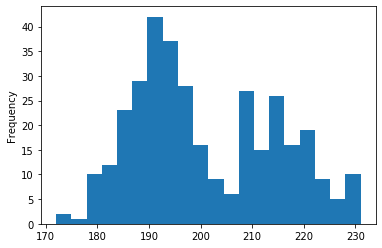

In [28]:
# what is the distribution of flipper lengths?
penguins["Flipper Length (mm)"].plot.hist(bins=20)

For discrete variables, we can use a bar chart.

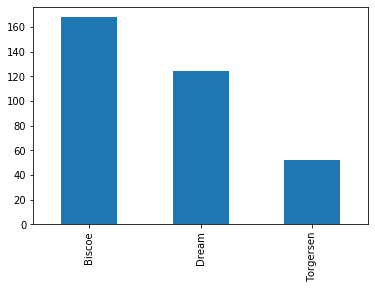

In [29]:
penguins["Island"].value_counts().plot.bar()

## Two variables

Sometimes we're also interested in how two variables relate to each other. For two continuous variables, we can use a scatter plot.

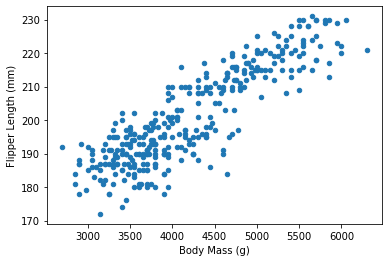

In [30]:
penguins.plot.scatter(x="Body Mass (g)", y="Flipper Length (mm)")

For a discrete and a continuous variable, you can use small multiples.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d7477950>,
      dtype=object)

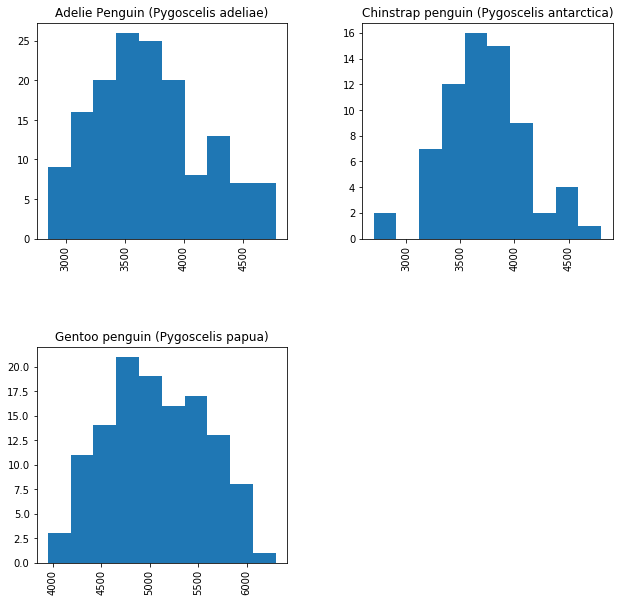

In [31]:
penguins["Body Mass (g)"].hist(by=penguins["Species"], figsize=(10, 10))

An alternative to small multiples is colorcoding

Species
Adelie Penguin (Pygoscelis adeliae)          AxesSubplot(0.125,0.125;0.775x0.755)
Chinstrap penguin (Pygoscelis antarctica)    AxesSubplot(0.125,0.125;0.775x0.755)
Gentoo penguin (Pygoscelis papua)            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Body Mass (g), dtype: object

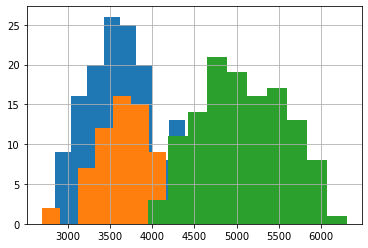

In [32]:
penguins.groupby("Species")["Body Mass (g)"].hist()

### Three or more variables

How do we visualize more than two variables in two dimensions? There's a lot of options! For example, if we wanted to compare body mass and flipper length, but across species, we can use small multiples or color-coding also!

In [33]:
penguins.Species.unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

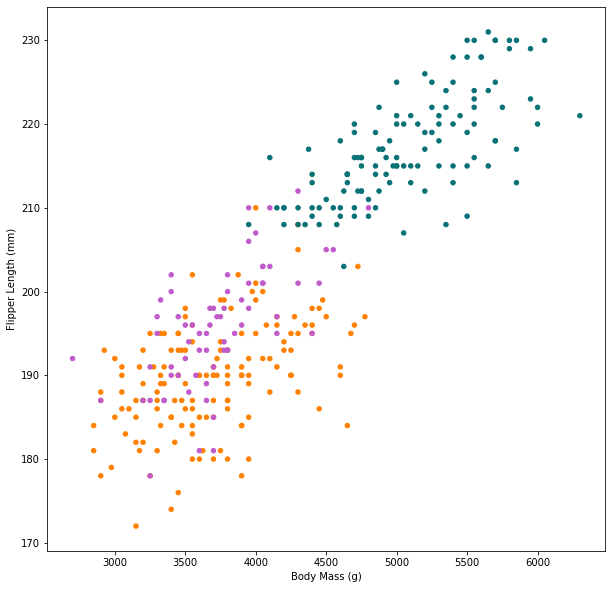

In [34]:
colormap = {
    "Adelie Penguin (Pygoscelis adeliae)": "#ff8100",
    "Gentoo penguin (Pygoscelis papua)": "#087175",
    "Chinstrap penguin (Pygoscelis antarctica)": "#c15bcb"
}
penguins.plot.scatter(x="Body Mass (g)", y="Flipper Length (mm)", c=penguins.Species.apply(colormap.get), figsize=(10, 10))

## Seaborn, the golden child

As your visualizations become more complex and less exploratory, you might find `matplotlib` annoying or restricting. A good alternative is `seaborn`, which is a plotting library that provides an abstraction over `matplotlib`.

In [35]:
import seaborn as sns
sns.set()  # sets settings

In [36]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /Users/aidanloughney/opt/anaconda3/lib/python3.7/site-packages (0.11.0)


Let's do the color-coded scatter plot again!

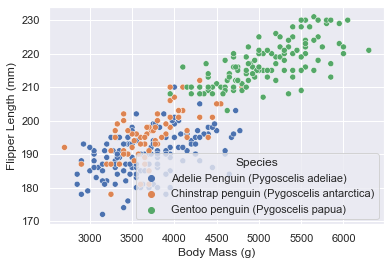

In [37]:
sns.scatterplot(data=penguins, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species")

Seaborn also makes it easy for us to add even more dimensions to our visualization.

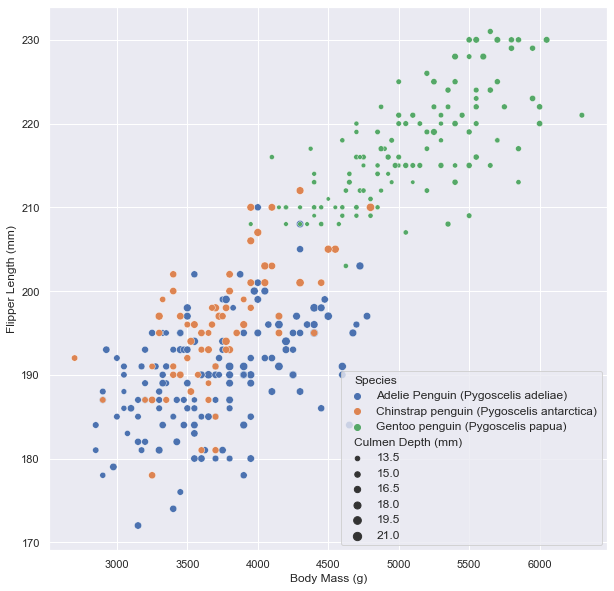

In [38]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=penguins, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species", size="Culmen Depth (mm)")

Using some of Seaborn's more advanced visualizations, we might even discover some actionable patterns (you can see just some of the things `seaborn` can do [here](https://seaborn.pydata.org/examples/index.html)).

Let's go back to our initial 1-dimensional continuous plots for a second.

/Users/aidanloughney/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


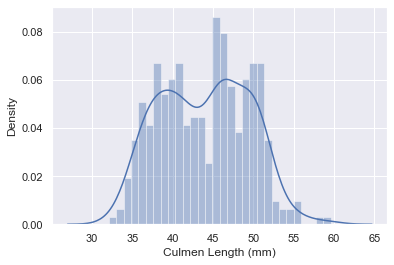

In [39]:
sns.distplot(penguins["Culmen Length (mm)"], bins=30)

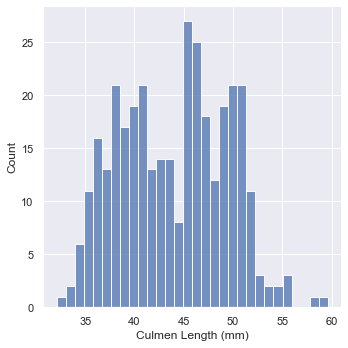

In [40]:
sns.displot(data=penguins, x="Culmen Length (mm)", bins=30)

This is cool and all, but what if we want a smoother representation of the distribution? Seaborn provides "kernel density estimates", which is a fancy way of saying a smoother version of the histogram.

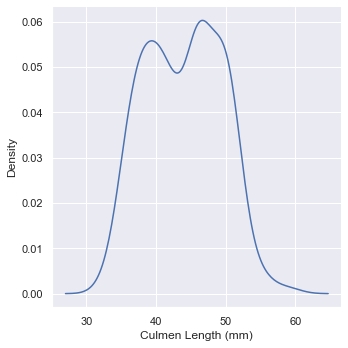

In [41]:
sns.displot(data=penguins, x="Culmen Length (mm)", kind="kde")

We can even plot the KDEs of two different continuous variables against each other!

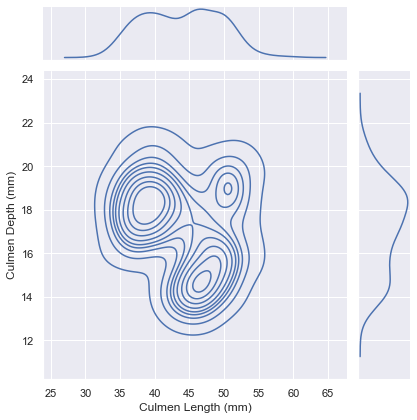

In [42]:
sns.jointplot(data=penguins, x="Culmen Length (mm)", y="Culmen Depth (mm)", kind="kde")

Now, let's split by species to see if we can spot any differences.

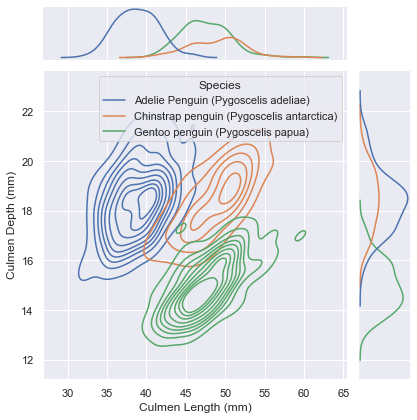

In [43]:
sns.jointplot(data=penguins, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", kind="kde")

# Exercises

Unless otherwise noted, these should be one line of code.

In [49]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a

c = a[3:]
c

# reverse the list
e = a[::-1]
e

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
d = [i*i for i in a]
d

[1, 4, 9, 16, 25, 36]

In [50]:
# create a numpy array from this list

b = np.array(a) # change this

In [51]:
# find the mean of b
b.mean()

3.5

In [52]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
b = b*b
b

array([ 1,  4,  9, 16, 25, 36])

In [53]:
# change b from a length-6 list to a 2x3 matrix
c = b.reshape(2,3)

In [54]:
c

array([[ 1,  4,  9],
       [16, 25, 36]])

In [55]:
# find the mean value of each row
np.mean(c, axis=0)


array([ 8.5, 14.5, 22.5])

In [56]:
# find the mean value of each column
np.mean(c, axis=1)

array([ 4.66666667, 25.66666667])

In [57]:
# find the third column of b
c[:,2]

array([ 9, 36])

In [58]:
# load in the "starbucks.csv" dataset
starbucks = pd.read_csv("./starbucks.csv")

In [59]:
starbucks.head

<bound method NDFrame.head of               Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)  

In [60]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
starbucks["Calories"].mean()

193.87190082644628

In [61]:
# how many different categories of beverages are there?
starbucks["Beverage_category"].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [62]:
# what is the average # calories for each beverage category?
starbucks.groupby("Beverage_category")["Calories"].mean()

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

In [63]:
# what beverage preparation includes the most sugar on average?
starbucks.groupby("Beverage_prep")["Calories"].mean()

Beverage_prep
2% Milk               218.000000
Doppio                 10.000000
Grande                 85.714286
Grande Nonfat Milk    209.615385
Short                  37.000000
Short Nonfat Milk      99.166667
Solo                    5.000000
Soymilk               207.272727
Tall                   63.428571
Tall Nonfat Milk      147.826087
Venti                 118.571429
Venti Nonfat Milk     260.000000
Whole Milk            283.750000
Name: Calories, dtype: float64

In [72]:
# what is the average % daily value calcium content for each beverage?
# HINT: make sure your columns have the datatypes you want
# (you can use more than one line for this one)
starbucks['Calcium (% DV)'].dtypes
starbucks['Calcium'] = starbucks['Calcium (% DV)'].str.rstrip('%').astype('float') / 100.0
starbucks.groupby("Beverage_category")["Calcium"].mean()

Beverage_category
Classic Espresso Drinks              0.273448
Coffee                               0.005000
Frappuccino® Blended Coffee          0.122778
Frappuccino® Blended Crème           0.138462
Frappuccino® Light Blended Coffee    0.113333
Shaken Iced Beverages                0.040000
Signature Espresso Drinks            0.313750
Smoothies                            0.133333
Tazo® Tea Drinks                     0.236538
Name: Calcium, dtype: float64

In [157]:
# It's bulking season. What drink should Renee get so that she maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
drink = starbucks.groupby("Beverage")
drink[["Calories", "Protein (g)"]].agg({"Calories": "min", "Protein (g)": "max"})

,Calories,Protein (g)
Beverage,,
Banana Chocolate Smoothie,280,20.0
Brewed Coffee,3,1.0
Caffè Americano,5,1.0
Caffè Latte,70,16.0
Caffè Mocha (Without Whipped Cream),110,17.0
Cappuccino,50,10.0
Caramel,100,5.0
Caramel (Without Whipped Cream),180,5.0
Caramel Apple Spice (Without Whipped Cream),140,0.0


Beverage_category
Classic Espresso Drinks              AxesSubplot(0.125,0.125;0.775x0.755)
Coffee                               AxesSubplot(0.125,0.125;0.775x0.755)
Frappuccino® Blended Coffee          AxesSubplot(0.125,0.125;0.775x0.755)
Frappuccino® Blended Crème           AxesSubplot(0.125,0.125;0.775x0.755)
Frappuccino® Light Blended Coffee    AxesSubplot(0.125,0.125;0.775x0.755)
Shaken Iced Beverages                AxesSubplot(0.125,0.125;0.775x0.755)
Signature Espresso Drinks            AxesSubplot(0.125,0.125;0.775x0.755)
Smoothies                            AxesSubplot(0.125,0.125;0.775x0.755)
Tazo® Tea Drinks                     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Calories, dtype: object

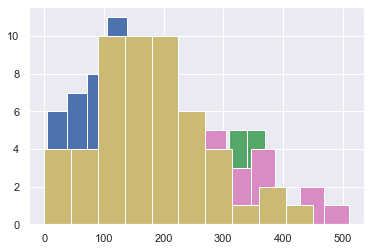

In [67]:
# plot the distribution of the number of calories in drinks using matplotlib
starbucks.groupby("Beverage_category")["Calories"].hist()
#drink["Calories"].value_counts().plot.bar()

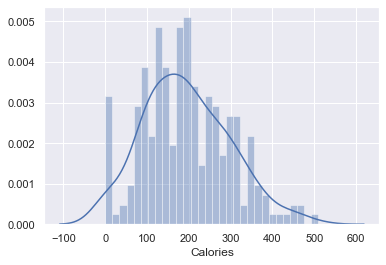

In [64]:
# plot the same distribution using seaborn. what about a density plot instead?
sns.distplot(starbucks["Calories"], bins=30)


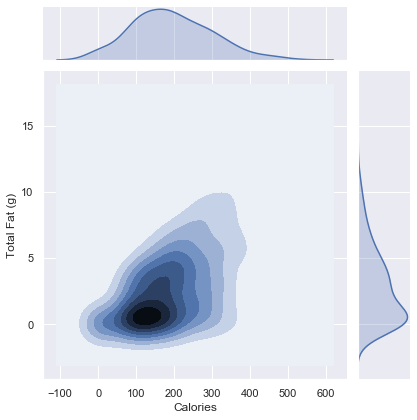

In [68]:
# plot calories against total fat using seaborn
#sns.jointplot(data=starbucks, x="Calories", y="Total Fat (g)", kind="kde")
sns.jointplot(data=starbucks, x="Calories", y="Total Fat (g)", kind="kde")

Beverage_prep
2% Milk               AxesSubplot(0.125,0.125;0.775x0.755)
Doppio                AxesSubplot(0.125,0.125;0.775x0.755)
Grande                AxesSubplot(0.125,0.125;0.775x0.755)
Grande Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Short                 AxesSubplot(0.125,0.125;0.775x0.755)
Short Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Solo                  AxesSubplot(0.125,0.125;0.775x0.755)
Soymilk               AxesSubplot(0.125,0.125;0.775x0.755)
Tall                  AxesSubplot(0.125,0.125;0.775x0.755)
Tall Nonfat Milk      AxesSubplot(0.125,0.125;0.775x0.755)
Venti                 AxesSubplot(0.125,0.125;0.775x0.755)
Venti Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Whole Milk            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Calories, dtype: object

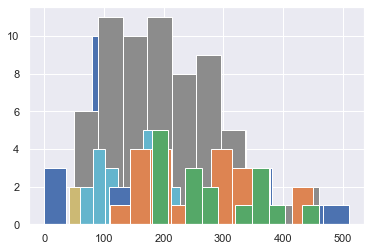

In [70]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

starbucks.groupby("Beverage_prep")["Calories"].hist()